# API 연동
공공데이터포털 오픈API 데이터형은 JSON을 XML로 전달하므로,   
request와 딕셔너리를 활용하면 됨

# JSON 활용 연습
http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31

In [1]:
import requests, json, pandas as pd

In [2]:
URL ='http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31'
resp = requests.get(URL)

In [3]:
resp

<Response [200]>

In [4]:
# 텍스트
data1 = resp.text
print(type(data1), len(data1))
print(data1)

<class 'str'> 37824
[{"id":"41596","date":"20190102","symbol":null,"open":"184.63","close":"186.29","high":"187.67","low":"184.17","settlement":"186.2","volume":"91835"},{"id":"41597","date":"20190103","symbol":null,"open":"186.2","close":"188.77","high":"189.59","low":"185.92","settlement":"188.77","volume":"78995"},{"id":"41603","date":"20190104","symbol":null,"open":"188.77","close":"189.59","high":"190.6","low":"188.49","settlement":"189.96","volume":"70816"},{"id":"41609","date":"20190107","symbol":null,"open":"190.33","close":"189.78","high":"190.51","low":"188.68","settlement":"189.87","volume":"68009"},{"id":"41610","date":"20190108","symbol":null,"open":"189.78","close":"190.79","high":"192.72","low":"188.77","settlement":"190.24","volume":"118268"},{"id":"41617","date":"20190109","symbol":null,"open":"190.97","close":"190.88","high":"192.44","low":"190.42","settlement":"191.06","volume":"87637"},{"id":"41624","date":"20190110","symbol":null,"open":"190.88","close":"188.77","h

In [5]:
# json 으로 변환, 딕셔너리 하나가 1개의 요소로 인정되어 252개로 줄음
data2 = resp.json()
print(type(data2), len(data2))
print(data2)

<class 'list'> 252
[{'id': '41596', 'date': '20190102', 'symbol': None, 'open': '184.63', 'close': '186.29', 'high': '187.67', 'low': '184.17', 'settlement': '186.2', 'volume': '91835'}, {'id': '41597', 'date': '20190103', 'symbol': None, 'open': '186.2', 'close': '188.77', 'high': '189.59', 'low': '185.92', 'settlement': '188.77', 'volume': '78995'}, {'id': '41603', 'date': '20190104', 'symbol': None, 'open': '188.77', 'close': '189.59', 'high': '190.6', 'low': '188.49', 'settlement': '189.96', 'volume': '70816'}, {'id': '41609', 'date': '20190107', 'symbol': None, 'open': '190.33', 'close': '189.78', 'high': '190.51', 'low': '188.68', 'settlement': '189.87', 'volume': '68009'}, {'id': '41610', 'date': '20190108', 'symbol': None, 'open': '189.78', 'close': '190.79', 'high': '192.72', 'low': '188.77', 'settlement': '190.24', 'volume': '118268'}, {'id': '41617', 'date': '20190109', 'symbol': None, 'open': '190.97', 'close': '190.88', 'high': '192.44', 'low': '190.42', 'settlement': '191

In [6]:
data2

[{'id': '41596',
  'date': '20190102',
  'symbol': None,
  'open': '184.63',
  'close': '186.29',
  'high': '187.67',
  'low': '184.17',
  'settlement': '186.2',
  'volume': '91835'},
 {'id': '41597',
  'date': '20190103',
  'symbol': None,
  'open': '186.2',
  'close': '188.77',
  'high': '189.59',
  'low': '185.92',
  'settlement': '188.77',
  'volume': '78995'},
 {'id': '41603',
  'date': '20190104',
  'symbol': None,
  'open': '188.77',
  'close': '189.59',
  'high': '190.6',
  'low': '188.49',
  'settlement': '189.96',
  'volume': '70816'},
 {'id': '41609',
  'date': '20190107',
  'symbol': None,
  'open': '190.33',
  'close': '189.78',
  'high': '190.51',
  'low': '188.68',
  'settlement': '189.87',
  'volume': '68009'},
 {'id': '41610',
  'date': '20190108',
  'symbol': None,
  'open': '189.78',
  'close': '190.79',
  'high': '192.72',
  'low': '188.77',
  'settlement': '190.24',
  'volume': '118268'},
 {'id': '41617',
  'date': '20190109',
  'symbol': None,
  'open': '190.97',


In [8]:
# for문으로 돌려서 키값으로 어펜드로 인덱싱
id_, date, symbol, open_, close= [], [], [], [], []

for item in data2 :
    id_.append(item['id'])
    date.append(item['date'])
    symbol.append(item['symbol'])
    open_.append(item['open'])
    close.append(item['close'])

In [9]:
df = pd.DataFrame({
    'id' : id_,
    'date' : date,
    'symbol' :symbol,
    'open' : open_,
    'close' : close,
})

In [10]:
df.head()

,id,date,symbol,open,close
0,41596,20190102,None,184.63,186.29
1,41597,20190103,None,186.2,188.77
2,41603,20190104,None,188.77,189.59
3,41609,20190107,None,190.33,189.78
4,41610,20190108,None,189.78,190.79


# 공공데이터포털 API 아파트매매 실거래자료 수집
https://wikidocs.net/85279
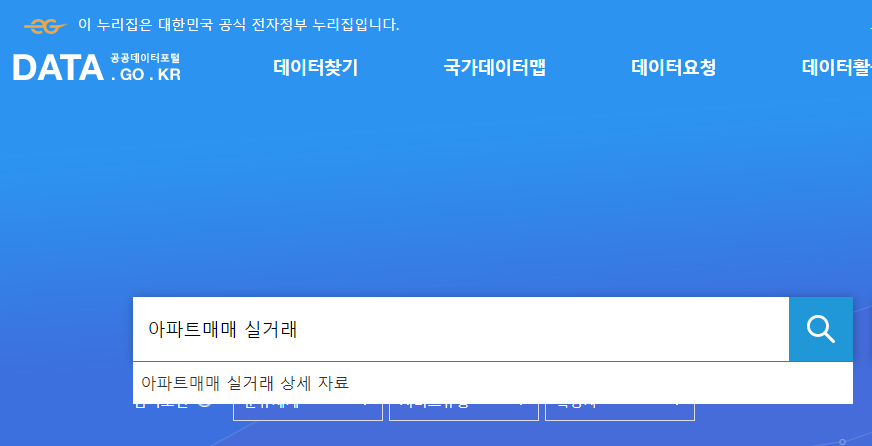

In [ ]:
BeautifulSoup?

In [18]:
import requests
from bs4 import BeautifulSoup

# 날짜 지역코드 api키 변수 지정

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'

# f 스트링으로 지역 / 날짜 / 서비스키 변수화하여 넣음
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text
textsrc

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>

In [14]:
BeautifulSoup?

In [19]:
soup = BeautifulSoup(textsrc, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><동

In [20]:
items = soup.select('response > body > items > item') 
items

[<item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 당주동</법정동><법정동본번코드>0145</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드

In [21]:
a = items[0].select('거래금액')
print(type(a))
print(a)

<class 'bs4.element.ResultSet'>
[<거래금액>    82,500</거래금액>]


In [22]:
b = items[0].select_one('거래금액')
print(type(b))
print(b)

<class 'bs4.element.Tag'>
<거래금액>    82,500</거래금액>


In [23]:
# 태그요소를 제외하고 텍스트만 받아오기
# 스키마로 길이를 지정해놔서 가격의 앞자리에 공백이 있음
# 쉼표를 넣기 위해서 str 타입으로 해놨음.

c = items[0].select_one('거래금액').text
print(type(c))
print(c)

<class 'str'>
    82,500


In [24]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')

items = soup.select('response > body > items > item') 

for item in items:
    print(item.select_one('거래금액').text.strip(),
          item.select_one('건축년도').text,
          item.select_one('년').text,
          item.select_one('법정동').text.strip(),
          item.select_one('아파트').text,
          item.select_one('월').text,
          item.select_one('일').text,
          item.select_one('전용면적').text,
          item.select_one('지번').text,
          item.select_one('지역코드').text,
          item.select_one('층').text)

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12


In [25]:
# 반복되는 코드 정리
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

for item in items:
    for tag in item_list:
        print(item.select_one(tag).text.strip(), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## 결측값 채우기
요청 정보에 대한 응답 데이터가 없을 수도 있다.   
이 경우 별도 처리가 없으면 오류가 발생하므로 대응이 필요하다.

In [26]:
import requests
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
for item in items:
    for tag in item_list:
        print(default_text(item.select_one(tag), ''), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## csv 파일 저장

In [27]:
# 테이블데이터를 데이터테이블로 만듬

import requests, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []

for item in items:
    data_list.append([ default_text(item.select_one(tag), '') for tag in item_list]) # value를 행기준으로 맞춤, 110 X 11
print(data_list)

df = pd.DataFrame(data_list, columns=item_list)
print('='*50)
print(df)
df.to_csv('./sample/아파트매매실거래자료수집.csv', index=False, encoding='cp949') 

[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '11110', '8'], ['120,000', '2003', '2015', '내수동', '경희궁파크팰리스', '12', '24', '146.33', '95', '11110', '4'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '17', '16.98', '195-10', '11110', '8'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '18', '16.98', '195-10', '11110', '4'], ['57,000', '2006', '2015', '명륜1가', '렉스빌', '12', '29', '106.98', '19', '11110', '3'], ['44,000', '1995', '2015', '명륜2가', '아남1', '12', '1', '84.8', '4', '11110', '18'], ['52,000', '1995', '2015', '명륜2가', '아남1', '12', '10', '84.9', '4', '11110', '12']]
      거래금액  건축년도     년   법정동                  아파트   월   일    전용면적      지번  \
0   82,500  2008  2015   사직동  광화문

In [28]:
# 기존 코드
l = []
for item in items:
    print(default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), ''))
    l.append([default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), '')])
print(l)

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 9 11110 11
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 145 11110 8
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 110-15 11110 6
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 71 11110 8
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 95 11110 4
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 195-10 11110 8
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 195-10 11110 4
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 19 11110 3
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 4 11110 18
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 4 11110 12
[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '71', '11110', '8'], ['120,000', '2003', '

## 여러달 수집

In [29]:
import datetime, dateutil
start_datetime = datetime.datetime(2023, 1, 1)
start_datetime

datetime.datetime(2023, 1, 1, 0, 0)

In [30]:
# relativedelta -> 
start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)
start_datetime 

datetime.datetime(2023, 2, 1, 0, 0)

In [31]:
# 연과 월만 보이게 포맷 변경 strftime
date = start_datetime.strftime('%Y%m') #
date

'202302'

In [32]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

# Start_Datetime 넣기
start_datetime = datetime.datetime(2023, 1, 1)

data_list = []
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

#와일문으로 1월부터 시작 ->9월에는 브레이크=8월꺼까지 출력
while True:
    date = start_datetime.strftime('%Y%m') #202301
    
    if date >= '202309':
        break
        
    region_code = '11110'
    
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
    url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

    res = requests.get(url)
    textsrc = res.text

    soup = BeautifulSoup(textsrc, 'xml')
    items = soup.select('response > body > items > item') 
    
    print('='*10, date, '='*10)
    
    for item in items:
        data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
    # 먼스 증가해서 와일문이 9월에 중단되도록 증감 코드 삽입
    start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)  # += 1달 

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949') 

========== 202301 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12']]
[['200,000', '2008', '2023', '사직동', '

========== 202303 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202304 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202305 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202306 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202307 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202308 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

## 여러 지역 코드 수집
지역 코드 : 각 지역별 코드 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리   
https://www.data.go.kr/data/15123287/fileData.do

```python
# import csv
# with open('region_code.csv', 'r', encoding='euc-kr') as f :
#     for line in csv.reader(f):
#         print(line)
data = pd.read_csv("region_code.csv", sep=",")
data
```

In [33]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []      

# 지역코드
lawd_cds = [11140, 11170, 11200]
# lawd_cds = [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
#        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
#        11560, 11590, 11620, 11650, 11680, 11710, 11740]

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'    
    
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    # 지역코드 돌리는 for문 추가
    for lawd_cd in lawd_cds:
        print('='*5, date, lawd_cd, '='*5)
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={lawd_cd}&DEAL_YMD={date}&serviceKey={apikey}'

        res = requests.get(url)
        textsrc = res.text

        soup = BeautifulSoup(textsrc, 'xml')
        items = soup.select('response > body > items > item') 
           
        for item in items:
            data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
        start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949')
print('저장 완료')

===== 202301 11140 =====
[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4']]
===== 202301 11170 =====
[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75',

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

# 네이버 지식인 API 연동
https://developers.naver.com/docs/serviceapi/search/kin/kin.md#%EC%A7%80%EC%8B%9DiN

In [34]:
import requests, time, os, json
from html import unescape

In [35]:
# input
client_id = 'bQE9K9zF3cAX5ZnDwIU0'
client_secret = 'PE1NLJV7vk'

queries = ['전주 여행', '경주 여행']
goal_page = 5

In [36]:
# setting
user_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) " + \
             "AppleWebKit/537.36 (KHTML, like Gecko) " + \
             "Chrome/51.0.2704.103 Safari/537.36"

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [37]:
# 데이터수집오류를 막기 위해 미리 파일을 만들어두고 거기에 데이터를 넣음
# 데이터부터 뽑고 파일만들기로 하면 오류나면 다 날라가기때문에 미리 만듬(꼭 해야되는건아님)

file_name = './sample/naver_kin.txt'

#파일네임의 파일을 w쓰기로 불러오고 utf08로 인코딩
with open(file_name, 'w', encoding='utf-8') as f :
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')

In [38]:
url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + queries[0] + "&start=" + str(1)
response = requests.get(url, headers=headers)
response

<Response [200]>

In [39]:
print(response.text)

{
	"lastBuildDate":"Fri, 15 Mar 2024 11:43:18 +0900",
	"total":41223,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"<b>전주여행<\/b>코스좀짜주세요ㅜㅜ",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... 알려주세요ㅠㅠ  <b>전주여행<\/b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... "
		},
		{
			"title":"<b>전주<\/b> 숙소 갈만한 곳좀 알려주세요!",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0",
			"description":"... 남자친구랑 오랜만에 <b>전주 여행<\/b>이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... "
		},
		{
			"title":"1박2일 <b>전주<\/b> 커플<b>여행<\/b>",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&e

In [40]:
# 딕셔너리 형식을 파일로 뽑으면 json
json.loads(response.text)

{'lastBuildDate': 'Fri, 15 Mar 2024 11:43:18 +0900',
 'total': 41223,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
   'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '},
  {'title': '<b>전주</b> 숙소 갈만한 곳좀 알려주세요!',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
   'description': '... 남자친구랑 오랜만에 <b>전주 여행</b>이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... '},
  {'title': '1박2일 <b>전주</b> 커플<b>여행</b>',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank

In [41]:
# items 안에 타이틀, 링크, 디스크립션 있는거 확인하고 items를 따로 뽑음
json.loads(response.text)['items']

[{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
  'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
  'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '},
 {'title': '<b>전주</b> 숙소 갈만한 곳좀 알려주세요!',
  'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
  'description': '... 남자친구랑 오랜만에 <b>전주 여행</b>이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... '},
 {'title': '1박2일 <b>전주</b> 커플<b>여행</b>',
  'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0',
  'description': '... <b>전주 여행</b>에 대해 도움을 드릴게요. 1. 남자친구의 차를 이용할지 KTX를 이용할지에 대해서는 여러 가지 요소를 

In [42]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '}

In [43]:
def get_list(query, page):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

# 인덱스 만들기 귀찮으니 enumerate로 뽑기
# elm 태그에서 title 링크 디스크립션 뽑음( <b> 같은 태그는 없애고 )
    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = unescape(elm['description'].replace("<b>", "").replace("</b>", ""))
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description])
        
        # 처음에 만들어둔 파일에 add로 추가해서 누적해서 기록하기
        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')

    return

In [45]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(6.0) #웹페이지 크롤링 매너 최소 6초

===== 전주 여행 0 =====
['전주 여행', 1, '전주여행코스좀짜주세요ㅜㅜ', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0', '... 알려주세요ㅠㅠ  전주여행코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... ', '전주여행코스좀짜주세요ㅜㅜ ... 알려주세요ㅠㅠ  전주여행코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... ']
['전주 여행', 2, '전주 숙소 갈만한 곳좀 알려주세요!', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '... 남자친구랑 오랜만에 전주 여행이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... ', '전주 숙소 갈만한 곳좀 알려주세요! ... 남자친구랑 오랜만에 전주 여행이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... ']
['전주 여행', 3, '1박2일 전주 커플여행', 'https://kin.naver.com/qna/detail.naver?d1i

===== 전주 여행 1 =====
['전주 여행', 101, '전주 숙소 갈만한 곳좀 알려주세요!', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '... 남자친구랑 오랜만에 전주 여행이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... ', '전주 숙소 갈만한 곳좀 알려주세요! ... 남자친구랑 오랜만에 전주 여행이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... ']
['전주 여행', 102, '1박2일 전주 커플여행', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '... 전주 여행에 대해 도움을 드릴게요. 1. 남자친구의 차를 이용할지 KTX를 이용할지에 대해서는 여러 가지 요소를 고려해보셔야 합니다. 만약 교통체증이 예상되는 날짜라면 KTX를 이용하는 것이 편할 수 있습니다. 또한, 남자친구의... ', '1박2일 전주 커플여행 ... 전주 여행에 대해 도움을 드릴게요. 1. 남자친구의 차를 이용할지 KTX를 이용할지에 대해서는 여러 가지 요소를 고려해보셔야 합니다. 만약 교통체증이 예상되는 날짜라면 KTX를 이용하는 것이 편할 수 있습니다. 또한, 남자친구의... ']
['전주 여행', 103, '전주 여행', 'https://kin.n

===== 전주 여행 2 =====
['전주 여행', 201, '1박2일 전주 커플여행', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '... 전주 여행에 대해 도움을 드릴게요. 1. 남자친구의 차를 이용할지 KTX를 이용할지에 대해서는 여러 가지 요소를 고려해보셔야 합니다. 만약 교통체증이 예상되는 날짜라면 KTX를 이용하는 것이 편할 수 있습니다. 또한, 남자친구의... ', '1박2일 전주 커플여행 ... 전주 여행에 대해 도움을 드릴게요. 1. 남자친구의 차를 이용할지 KTX를 이용할지에 대해서는 여러 가지 요소를 고려해보셔야 합니다. 만약 교통체증이 예상되는 날짜라면 KTX를 이용하는 것이 편할 수 있습니다. 또한, 남자친구의... ']
['전주 여행', 202, '전주 여행', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=457210792&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '... 전주 여행을 가시려하는군요! 그렇다면 전주에서 연인들이 제일 많이 찾는 곳들 추천해드리겠습니다. ▶전주한옥마을 ▶전주동물원 ▶한국도로공사수목원 ▶전주향교 ▶덕진공원... ', '전주 여행 ... 전주 여행을 가시려하는군요! 그렇다면 전주에서 연인들이 제일 많이 찾는 곳들 추천해드리겠습니다. ▶전주한옥마을 ▶전주동물원 ▶한국도로공사수목원 ▶전주향교 ▶덕진공원... ']
['전주 여행', 203, '전주여행!', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=459792395&qb=7KCE7KO8IO

===== 전주 여행 3 =====
['전주 여행', 301, '전주 여행', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=457210792&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '... 전주 여행을 가시려하는군요! 그렇다면 전주에서 연인들이 제일 많이 찾는 곳들 추천해드리겠습니다. ▶전주한옥마을 ▶전주동물원 ▶한국도로공사수목원 ▶전주향교 ▶덕진공원... ', '전주 여행 ... 전주 여행을 가시려하는군요! 그렇다면 전주에서 연인들이 제일 많이 찾는 곳들 추천해드리겠습니다. ▶전주한옥마을 ▶전주동물원 ▶한국도로공사수목원 ▶전주향교 ▶덕진공원... ']
['전주 여행', 302, '전주여행!', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=459792395&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '크리스마스에 단둘이서 당일치기로 전주여행 하기로했습니다 고등학생인데요 어느정도 들고가는게맞고 전주는 할게 뭐뭐 있을까요..?? 제대로 답변해주세요 ㅠㅡㅠ  대학로와 투어공연하는 연극 추천해 드릴께요!!!... ', '전주여행! 크리스마스에 단둘이서 당일치기로 전주여행 하기로했습니다 고등학생인데요 어느정도 들고가는게맞고 전주는 할게 뭐뭐 있을까요..?? 제대로 답변해주세요 ㅠㅡㅠ  대학로와 투어공연하는 연극 추천해 드릴께요!!!... ']
['전주 여행', 303, '강아지와함께 전주여행 가능한곳ㅜ', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=454069765&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&ra

===== 전주 여행 4 =====
['전주 여행', 401, '전주여행!', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=459792395&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '크리스마스에 단둘이서 당일치기로 전주여행 하기로했습니다 고등학생인데요 어느정도 들고가는게맞고 전주는 할게 뭐뭐 있을까요..?? 제대로 답변해주세요 ㅠㅡㅠ  대학로와 투어공연하는 연극 추천해 드릴께요!!!... ', '전주여행! 크리스마스에 단둘이서 당일치기로 전주여행 하기로했습니다 고등학생인데요 어느정도 들고가는게맞고 전주는 할게 뭐뭐 있을까요..?? 제대로 답변해주세요 ㅠㅡㅠ  대학로와 투어공연하는 연극 추천해 드릴께요!!!... ']
['전주 여행', 402, '강아지와함께 전주여행 가능한곳ㅜ', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=454069765&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=6&search_sort=0&spq=0', '전주여행갈껀데요ㅜ 강아지 같이 동반할꺼라서요ㅜ 혹시 강아지같이 갈수있는곳좀 알려주세요 맛집이랑 관광징ᆢㄷ  반려동물 1등 여행앱 반려생활입니다 : ) 하늘이 맑은 가을에 전주 여행을 떠나시는군요! 강아지랑 함께 더 좋은 추억... ', '강아지와함께 전주여행 가능한곳ㅜ 전주여행갈껀데요ㅜ 강아지 같이 동반할꺼라서요ㅜ 혹시 강아지같이 갈수있는곳좀 알려주세요 맛집이랑 관광징ᆢㄷ  반려동물 1등 여행앱 반려생활입니다 : ) 하늘이 맑은 가을에 전주 여행을 떠나시는군요! 강아지랑 함께 더 좋은 추억... ']
['전주 여행', 403, '전주 여행코스 추천이요~!', 'https://kin.naver.com/qna/detail.naver?d1id=9&

===== 경주 여행 0 =====
['경주 여행', 1, '경주여행 코스추천해주세요!', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=462894228&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0', '... 질문하신 [경주여행코스] 관련 답변 드리도록 하겠습니다. 2박 3일간 다녀올만한 경주여행코스 중에서는 경주동궁원, 버드파크, 추억의달동네, 바니베어뮤지엄 등 있으며 이 외에 주변에 둘러볼만한 곳들도 많이 있으니 여행하시는데... ', '경주여행 코스추천해주세요! ... 질문하신 [경주여행코스] 관련 답변 드리도록 하겠습니다. 2박 3일간 다녀올만한 경주여행코스 중에서는 경주동궁원, 버드파크, 추억의달동네, 바니베어뮤지엄 등 있으며 이 외에 주변에 둘러볼만한 곳들도 많이 있으니 여행하시는데... ']
['경주 여행', 2, '경주 여행(내공100)', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=465245141&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '경주 여행 당일치기로 일찍아침에 거고 저녁 늦은시간에 갈려는데 꼭... 경주 여행 너무 좋습니다. 유적지가 워낙에 많기 때문에 가볼 곳들도... 아래 홈페이지 내용 경주 여행지 알아보시면 좋을 것 같습니다. https://kimeujum.com/', '경주 여행(내공100) 경주 여행 당일치기로 일찍아침에 거고 저녁 늦은시간에 갈려는데 꼭... 경주 여행 너무 좋습니다. 유적지가 워낙에 많기 때문에 가볼 곳들도... 아래 홈페이지 내용 경주 여행지 알아보시면 좋을 것 같습니다. https://kimeujum.com/']
['경주 여행', 3, '11월말 경주여행', 'https

===== 경주 여행 1 =====
['경주 여행', 101, '경주 여행(내공100)', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=465245141&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '경주 여행 당일치기로 일찍아침에 거고 저녁 늦은시간에 갈려는데 꼭... 경주 여행 너무 좋습니다. 유적지가 워낙에 많기 때문에 가볼 곳들도... 아래 홈페이지 내용 경주 여행지 알아보시면 좋을 것 같습니다. https://kimeujum.com/', '경주 여행(내공100) 경주 여행 당일치기로 일찍아침에 거고 저녁 늦은시간에 갈려는데 꼭... 경주 여행 너무 좋습니다. 유적지가 워낙에 많기 때문에 가볼 곳들도... 아래 홈페이지 내용 경주 여행지 알아보시면 좋을 것 같습니다. https://kimeujum.com/']
['경주 여행', 102, '11월말 경주여행', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=456230156&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '11월 말에 1박2일로 4명 경주여행갈건데 코스 추천 부탁드립니다.! 경주에 놀러 오시는 군요~ 1박 2일 코스에다가 11월... 그래도 패딩 느낌은 아니고 두꺼운 코트나 경량패딩 정도 입고 오시기를 추천드려요! 즐거운 경주 여행 되세요 :) ', '11월말 경주여행 11월 말에 1박2일로 4명 경주여행갈건데 코스 추천 부탁드립니다.! 경주에 놀러 오시는 군요~ 1박 2일 코스에다가 11월... 그래도 패딩 느낌은 아니고 두꺼운 코트나 경량패딩 정도 입고 오시기를 추천드려요! 즐거운 경주 여행 되세요 :) ']
['경주 여행', 103, '2박3일 경주여행코스 추천

===== 경주 여행 2 =====
['경주 여행', 201, '11월말 경주여행', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=456230156&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '11월 말에 1박2일로 4명 경주여행갈건데 코스 추천 부탁드립니다.! 경주에 놀러 오시는 군요~ 1박 2일 코스에다가 11월... 그래도 패딩 느낌은 아니고 두꺼운 코트나 경량패딩 정도 입고 오시기를 추천드려요! 즐거운 경주 여행 되세요 :) ', '11월말 경주여행 11월 말에 1박2일로 4명 경주여행갈건데 코스 추천 부탁드립니다.! 경주에 놀러 오시는 군요~ 1박 2일 코스에다가 11월... 그래도 패딩 느낌은 아니고 두꺼운 코트나 경량패딩 정도 입고 오시기를 추천드려요! 즐거운 경주 여행 되세요 :) ']
['경주 여행', 202, '2박3일 경주여행코스 추천', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=459771722&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '... 뚜벅이 위한 경주여행 코스 추천 부탁드려요~~!!  세분이 오붓하게 경주여행 계획하고 계시는군요~ 대중교통을 이용해서 돌아볼 생각이시라면 가볍게 코스를 짜보시는것도 좋을거 같습니다. 1.... ', '2박3일 경주여행코스 추천 ... 뚜벅이 위한 경주여행 코스 추천 부탁드려요~~!!  세분이 오붓하게 경주여행 계획하고 계시는군요~ 대중교통을 이용해서 돌아볼 생각이시라면 가볍게 코스를 짜보시는것도 좋을거 같습니다. 1.... ']
['경주 여행', 203, '경주여행 관련질문', 'https://kin.naver.com/qna/detail.naver?d1id=8&d

===== 경주 여행 3 =====
['경주 여행', 301, '2박3일 경주여행코스 추천', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=459771722&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '... 뚜벅이 위한 경주여행 코스 추천 부탁드려요~~!!  세분이 오붓하게 경주여행 계획하고 계시는군요~ 대중교통을 이용해서 돌아볼 생각이시라면 가볍게 코스를 짜보시는것도 좋을거 같습니다. 1.... ', '2박3일 경주여행코스 추천 ... 뚜벅이 위한 경주여행 코스 추천 부탁드려요~~!!  세분이 오붓하게 경주여행 계획하고 계시는군요~ 대중교통을 이용해서 돌아볼 생각이시라면 가볍게 코스를 짜보시는것도 좋을거 같습니다. 1.... ']
['경주 여행', 302, '경주여행 관련질문', 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=81204&docId=464245871&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '이번에 경주여행을 가게되었는데 중2학생입니다 KTX타고 부산에서 경주까지 가려고해요 기차표를 예매하는데 나이제한이있을까요? 기차표받을때 여권,청소년증 같은게 필요할까요? 코레일 앱으로 예매하는데 표는 어디서 받는건가요?... ', '경주여행 관련질문 이번에 경주여행을 가게되었는데 중2학생입니다 KTX타고 부산에서 경주까지 가려고해요 기차표를 예매하는데 나이제한이있을까요? 기차표받을때 여권,청소년증 같은게 필요할까요? 코레일 앱으로 예매하는데 표는 어디서 받는건가요?... ']
['경주 여행', 303, '경주여행(숙소추천)', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=46

===== 경주 여행 4 =====
['경주 여행', 401, '경주여행 관련질문', 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=81204&docId=464245871&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '이번에 경주여행을 가게되었는데 중2학생입니다 KTX타고 부산에서 경주까지 가려고해요 기차표를 예매하는데 나이제한이있을까요? 기차표받을때 여권,청소년증 같은게 필요할까요? 코레일 앱으로 예매하는데 표는 어디서 받는건가요?... ', '경주여행 관련질문 이번에 경주여행을 가게되었는데 중2학생입니다 KTX타고 부산에서 경주까지 가려고해요 기차표를 예매하는데 나이제한이있을까요? 기차표받을때 여권,청소년증 같은게 필요할까요? 코레일 앱으로 예매하는데 표는 어디서 받는건가요?... ']
['경주 여행', 402, '경주여행(숙소추천)', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=460129729&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=6&search_sort=0&spq=0', '안녕하세요 경기도권에 사는 사람입니다 내년 1월 중순쯤 경주여행을 갈 예정입니다 인원은 엄마3명과 초등5명 총 8명... 근데 추운 겨울 걷는건 비추입니다 ㅠㅠ 가까운 거리도 택시 타고 다니세요^^ < " " "" " 즐거운 경주여행 되시기... ', '경주여행(숙소추천) 안녕하세요 경기도권에 사는 사람입니다 내년 1월 중순쯤 경주여행을 갈 예정입니다 인원은 엄마3명과 초등5명 총 8명... 근데 추운 겨울 걷는건 비추입니다 ㅠㅠ 가까운 거리도 택시 타고 다니세요^^ < " " "" " 즐거운 경주여행 되시기... ']
['경주 여행', 403, '뚜벅이 경주여행', 'https://kin.naver.com/qn

# ChatGPT API 연동

In [ ]:
# pip install --upgrade openai
!pip install openai

In [68]:
import os
from openai import OpenAI

In [69]:
client = OpenAI(
  api_key= "api key 입력"
)

In [70]:
client.models.list()

SyncPage[Model](data=[Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev'), Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev'), Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal'), Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev'), Model(id='babbage', created=1649358449, object='model', owned_by='openai'), Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev'), Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai'), Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev'), Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev'), Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai'), Model(id='curie-similarity', created=1651172510, object=

In [71]:
for m in client.models.list():
    print(m)

Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal')
Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='babbage', created=1649358449, object='model', owned_by='openai')
Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai')
Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev')
Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev')
Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai')
Model(id='curie-similarity', created=1651172510, object='model', owned_by='openai-dev')


In [72]:
input_text = "인공지능이 뭐야"

In [ ]:
client.chat.completions.create?

In [73]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user",
         "content": input_text}
        ]
)

In [74]:
type(response)

openai.types.chat.chat_completion.ChatCompletion

In [75]:
response

ChatCompletion(id='chatcmpl-8Uoa3BLGAuv9o0ROP0gdPYUkfudVF', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.', role='assistant', function_call=None, tool_calls=None))], created=1702354963, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=226, prompt_tokens=15, total_tokens=241))

In [76]:
response.choices

[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.', role='assistant', function_call=None, tool_calls=None))]

In [77]:
response.choices[0].message.content

'인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.'

In [78]:
def chatgpt(input_text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": input_text}]
    )
    output = response.choices[0].message.content
    return output

In [79]:
chatgpt('what is ai')

'AI stands for Artificial Intelligence. It refers to the simulation of human intelligence in machines that are programmed to think, learn, and problem-solve like humans. AI encompasses various techniques such as machine learning, natural language processing, computer vision, and robotics. It has applications in a wide range of fields including healthcare, finance, transportation, gaming, and more. AI systems can analyze large amounts of data, recognize patterns, make predictions, and automate tasks, leading to improved efficiency and decision-making.'